# Non-rotating Newtonian Stars

George Pappas

Aristotle University of Thessaloniki

v1.0 (March 2019)

For the course of "Astrophysics" (Masters program on computational physics)

# Introduction

In this lecture we will cover non-rotating Newtonian stars. We will treat them as fluid configurations at hydrostatic equilibrium and we will study their structure and properties by solving the structure equations. 


## Fluid configurations


Stars are fluid configurations in equilibrium, that are supported by their internal pressure that acts against the compressing effects of gravity.  


In the simple case of an ideal barotropic fluid, the fluid variables are the local mass density $\rho$, the pressure $P$ and the velocity field $\vec{\,v}$. The equations for the structure of the configuration are, 

$$\frac{D\rho}{Dt}+\rho \vec{\,\nabla} .\vec{\,v} =0,\quad\quad\quad \textrm{(continuity eq.)}$$ 

$$\rho\frac{D\vec{\,v}}{Dt}=-\vec{\,\nabla}P+\rho \vec{\,f},\quad\quad \textrm{(Newton's 2nd law)}$$ 

$$P=P(\rho), \quad\quad\quad \textrm{(Equation of State)}$$

$$ \nabla^2 \Phi=4\pi G \rho , \quad\quad \textrm{(Field Equations for Gravity)}$$


where the last equation will provide the expression for the forces $\vec{\,f}$ acting on the fluid. 
When the fluid configuration is in equilibrium, then all the fluid velocities go to zero and the hydrostatic equilibrium equations are 

$$\frac{D\rho}{Dt}=0,\quad\quad\quad \textrm{(continuity eq.)}$$ 

$$0=-\vec{\,\nabla}P+\rho \vec{\,f},\quad\quad \textrm{(Newton's 2nd law)}$$ 

$$P=P(\rho), \quad\quad\quad \textrm{(Equation of State)}$$

$$ \nabla^2 \Phi=4\pi G \rho , \quad\quad \textrm{(Field Equations for Gravity)}$$


Furthermore, if we assume spherical symmetry, the above equations can be written as 

$$\frac{dm}{dr}= 4\pi \rho r^2,\quad\quad\quad\quad \textrm{(mass eq.)}$$ 

$$\frac{dP}{dr}=-\rho \frac{d\Phi}{dr},\quad\quad\quad\quad \textrm{(equilibrium eq.)}$$ 

$$P=P(\rho), \quad\quad\quad\quad \textrm{(Equation of State)}$$

$$ \frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\Phi}{dr}\right)=4\pi G \rho, \quad\quad \textrm{(Field Equations for Gravity)}$$


where we have replaced the mass continuity equation with the mass equation that gives the mass of the distribution within a given volume. 
The above system of equations can be reduced to the system 

$$\frac{dm}{dr}= 4\pi \rho r^2,\quad\quad\quad \textrm{(mass eq.)}$$ 

$$P'\frac{d\rho}{dr}=- \frac{G \rho m}{r^2},\quad\quad\quad \textrm{(equilibrium eq.)}$$ 


where $P'=dP/d\rho$, which is a system of coupled differential equations that is expressed in terms of the mass $m(r)$ and the density $\rho(r)$.


## Stars with polytropic EoS


We derived above a set of coupled differential equations that describe an equilibrium configuration for an arbitrary barotropic EoS, $P=P(\rho)$. We will now further assume that the EoS is of the particular form that is called polytropic, i.e., we will assume that the EoS has the form 

$$P=K \rho^{\Gamma}, $$

wher $\Gamma$ is the polytropic exponent of the EoS. The equation of state for matter can assume this form in a variaety of situations and for this reason polytropic EoSs have been extensively studied and are commonly used. We will discuss some such examples in what follows. For now, the hydrostatic equilibrium equations can be written in the form,


$$\frac{dm}{dr}= 4\pi \rho r^2,$$ 

$$K\Gamma \rho^{\Gamma-1}\frac{d\rho}{dr}=- \frac{G \rho m}{r^2},$$ 


To solve this system, one would need to provide the central values for the density and the mass. Furthermore, one can say that the surface of the star (at radius $R$) has been reached when the density becomes zero. The mass at $R$ will correspond to the total mass of the star $M$. 

Therefore the intial conditions are 

$$ m(0)=0, \quad \textrm{and} \quad \rho(0)=\rho_c. $$

From the above equations follows that near the center of the star, the mass will behave as 

$$m(r)\simeq \frac{4}{3}\pi \rho_c r^3, $$ 

while the density will go as,

$$\rho(r) \simeq \rho_c- \frac{2\pi G}{K\Gamma}\rho_c^{3-\Gamma} r^2 + \ldots $$




#### Computational Applications:

Now we will try to integrate the system of differential equations using the function odeint().

To do this, the system needs to be of the form 

$$\frac{dY}{dt} = f(Y,t) $$

wher $Y$ is the vector that contains the functions that we are looking for. 

/Users/pmzgp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


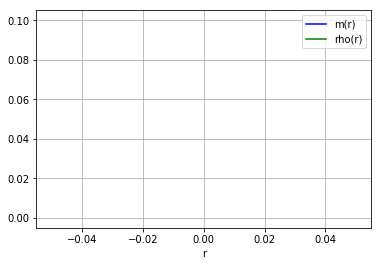

array([[0. , 0.1],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]])

(11, 2)

22

11

11

In [7]:
from matplotlib import pyplot as plt    # For plotting things
import numpy as np                      # For mathematical/numerical applications
from scipy.integrate import odeint      # For integrating ODEs


G=1.0                 # Arbitrary units
K=1.0                 # Arbitrary units
Gamma=5.0/3.0
  
# This defines a function that calculates the derivatives of the system 
# dY/dr = f(Y,r:G,Gamma,K)

def star(y, r, G, Gamma, K):
     return (4.0*np.pi*y[1]*r**2.0, \
             -(G/(K*Gamma))*y[0]*pow(y[1],2.0-Gamma)/r**2.0)   
    
    
y0 = (0.0, 0.1)     # This is the initial conditions vector 


r = np.linspace(0, 1, 11)    # This is an np.array object that creates 
                             # the integration grid using a linear 
                             # step in the interval between 0 and 1 that has size 1/11

# The following is the command that does the numerical integration 
# The argument is in the form (eqs_system, init_cond, integ_var_grid, arguments)

sol = odeint(star, y0, r, args=(G, Gamma, K))     

# The output of odeint() is an np.array object with two columns, i.e., (mass, density) 


plt.plot(r, sol[:, 0], 'b', label='m(r)')      # This command plots the results 
plt.plot(r, sol[:, 1], 'g', label='rho(r)')    # This command plots the results 
                                               # One needs to input an x-array and a
                                               # y-array to plot the y=f(x)
# To extract specific parts of the np.array one performs a "slicing" using the ":" 
# as an index argument to extract a range of elements and a specific index number 
# to extract an element

plt.legend(loc='best')
plt.xlabel('r')
plt.grid()
plt.show()


# To vew things we can use either print() or display() 
display(sol) 

# To see specific properties of an np.array "A" we can use A.shape and A.size
# In general the functions are np.shape() and np.size()

display(sol.shape)
display(sol.size) 

# The len() command gives the negth of an array, not the same as the size command

display(len(sol))
display(len(sol[:, 1]))

0.01

(4.188790204786391e-06, 0.9996230088815692)

/Users/pmzgp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


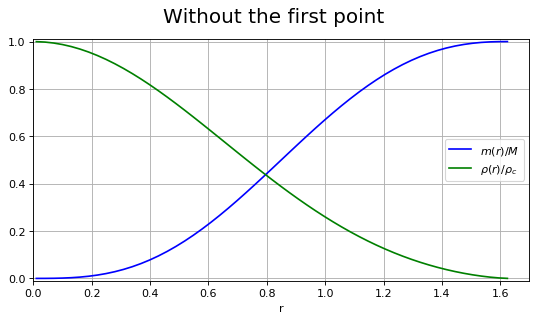

array([4.18879020e-06, 2.65745281e-04, 1.41894896e-03, 4.11922828e-03,
       9.00120355e-03, 1.66702133e-02, 2.76943680e-02, 4.25970981e-02,
       6.18504103e-02, 8.58689302e-02, 1.15004765e-01, 1.49543420e-01,
       1.89700571e-01, 2.35619870e-01, 2.87371843e-01, 3.44953735e-01,
       4.08290358e-01, 4.77235919e-01, 5.51576746e-01, 6.31034845e-01,
       7.15272223e-01, 8.03895887e-01, 8.96463414e-01, 9.92489007e-01,
       1.09144993e+00, 1.19279321e+00, 1.29594254e+00, 1.40030521e+00,
       1.50527905e+00, 1.61025923e+00, 1.71464497e+00, 1.81784582e+00,
       1.91928768e+00, 2.01841856e+00, 2.11471374e+00, 2.20768059e+00,
       2.29686283e+00, 2.38184441e+00, 2.46225282e+00, 2.53776197e+00,
       2.60809461e+00, 2.67302444e+00, 2.73237775e+00, 2.78603489e+00,
       2.83393154e+00, 2.87605992e+00, 2.91247020e+00, 2.94327214e+00,
       2.96863774e+00, 2.98880493e+00, 3.00408374e+00, 3.01486681e+00,
       3.02164824e+00, 3.02506255e+00, 3.02599248e+00,            nan,
      

array([9.99623009e-01, 9.97750006e-01, 9.93644822e-01, 9.87333187e-01,
       9.78854360e-01, 9.68261017e-01, 9.55618579e-01, 9.41004508e-01,
       9.24507505e-01, 9.06226597e-01, 8.86270145e-01, 8.64754759e-01,
       8.41804160e-01, 8.17547994e-01, 7.92120622e-01, 7.65659887e-01,
       7.38305902e-01, 7.10199843e-01, 6.81482782e-01, 6.52294567e-01,
       6.22772759e-01, 5.93051640e-01, 5.63261303e-01, 5.33526826e-01,
       5.03967537e-01, 4.74696377e-01, 4.45819366e-01, 4.17435161e-01,
       3.89634721e-01, 3.62501065e-01, 3.36109128e-01, 3.10525705e-01,
       2.85809484e-01, 2.62011157e-01, 2.39173606e-01, 2.17332159e-01,
       1.96514907e-01, 1.76743075e-01, 1.58031449e-01, 1.40388844e-01,
       1.23818620e-01, 1.08319232e-01, 9.38848344e-02, 8.05059210e-02,
       6.81700385e-02, 5.68625684e-02, 4.65676542e-02, 3.72692785e-02,
       2.89527368e-02, 2.16065877e-02, 1.52257643e-02, 9.81698009e-03,
       5.40981704e-03, 2.08591718e-03, 1.14503767e-04,            nan])

(101, 2)

N_s


55

Mass = 3.0259924822189226
Radius = 1.6246000000000003
=========These are tests==========
rho_s = 0.00011450376721443799 , rho_s = 0.00011450376721443799
rho_s+1 = nan , m_star+1 = nan , r_s+1 = 1.6545 , N_s+1 = 56
=========End of tests==========


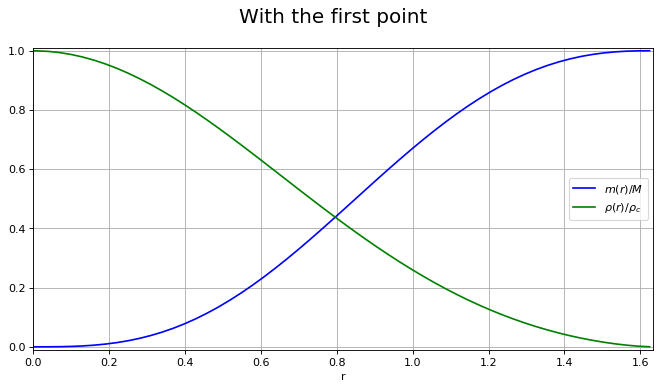

In [8]:
# r=0 is a problematic location. The rhs of our ODE system evaluates to infinity. 
# Redefining the initial conditions at the next point away from r=0 solves the problem

r = np.linspace(0, 1, 101)

y0 = (0.0, 1.0)                # This is an array, but not an np.array object 

dr=r[1]-r[0]
display(dr)

y1 = ((4.0/3.0)*np.pi*y0[1]*dr**3.0, \
      y0[1]-(2.0*np.pi*G/(K*Gamma))*pow(y0[1],3.0-Gamma)*dr**2.0)
display(y1)                   # This is our initial guess given by the Teylor expansion

r1 = np.linspace(dr, 3, 101)                      # This is an np.array object

sol = odeint(star, y1, r1, args=(G, Gamma, K))    # This is an np.array object

# sol2 = np.hstack([y0,sol])

plt.figure(figsize=(8, 4), dpi=80)


plt.suptitle('Without the first point', fontsize=18)

plt.xlim(0.0, 1.7) 
plt.ylim(-0.01, 1.01) 

plt.plot(r1, sol[:, 0]/3.02599248, 'b', label=r'$m(r)/M$')  # The plots
plt.plot(r1, sol[:, 1], 'g', label=r'$\rho(r)/\rho_c$')     # The plots 

plt.legend(loc='best')
plt.xlabel('r')
plt.grid()
plt.show()

display(sol[:, 0])
display(sol[0:56, 1])

display(sol.shape)

# So far we are missing the initial points. 
# We can add them to our solution by using horizontal stack and vertical stack. 
# We can only stack together simmilar objects. 

y01 = np.array([[y0[0], y0[1]]])            # This is an np.array object (vertical)
# display(y01.shape)

r0 = np.array([0.0])                        # This is an np.array object (horizontal)
# display(r0.shape)
# display(r1.shape)

#y0 = [0.0, 1.0]

r = np.hstack([r0,r1])
# display(r)

sol2 = np.vstack([y01,sol])

# This finds the index location of the surface in order to get the surface values
#  list(a).index(value)
# The function np.where(a == value) can also do the same thing with np.array objects

rho_surf = min(sol2[:,1])   # First we find the minimum density value of the array

# display(r.index(1.0))

r_max_in = list(sol2[:,1]).index(rho_surf)  # And then the index location of that value
print('N_s')
display(r_max_in)

R_star = r[r_max_in]
M_star = sol2[r_max_in,0]

print('Mass =', M_star)
print('Radius =', R_star)
print('=========These are tests==========')
print('rho_s =', sol2[r_max_in,1], ', rho_s =', rho_surf)
print('====================================')
print('rho_s+1 =', sol2[r_max_in+1,1], ', m_star+1 =', sol2[r_max_in+1,0],
      ', r_s+1 =', r[r_max_in+1], ', N_s+1 =', r_max_in+1)
print('=========End of tests==========')

plt.figure(figsize=(10, 5), dpi=80)

plt.xlim(0.0, R_star+dr) 
plt.ylim(-0.01, 1.01) 

plt.suptitle('With the first point', fontsize=18)

plt.plot(r[0:r_max_in+1], sol2[0:r_max_in+1, 0]/M_star, 'b', \
         label=r'$m(r)/M$')   # The plots
plt.plot(r[0:r_max_in+1], sol2[0:r_max_in+1, 1], 'g', \
         label=r'$\rho(r)/\rho_c$')      # The plots

plt.legend(loc='best')
plt.xlabel('r')
plt.grid()
plt.show()

#### Exercises:


1. Why does the algorithm stop before the density becomes negative? Implement a method to better estimate the surface location and the total Mass of the configuration.

2. Using the odeint() command, test the convergence properties of the system. Try to find ways within python to get better convergence and accuracy. How do different ways of choosing the initial conditions affect the resulting Mass and Radius of the stellar model?

3. Calculate models with different polytropic exponents and compare the mass and density distributions as functions of the radius within the star. One can start by using known EoS cases, beyond the $\Gamma=5/3$ case discussed above. Another approach can be to use a parameterization for the EoS of the form $P=k\rho^{1+1/n}$, and use integer values for $n$ (note that $\Gamma=5/3$ corresponds to $n=3/2$). What do you observe for the mass profiles?

4. In the above presentation we have set all the relevant constants to $1$, which amounts to a specific choice of units. Find a way of making the initial system of equations of structure dimensionless keeping track of the various constants. From there try to infer the physical meaning of some of the parameters, such as the EoS constant $K$. Find the right values and construct a configuration of astrophysical size.   


## Lane-Emden equation




The above system of structure equations, together with the polytropic EoS can be treated in a more systematic way if we follow a different approach. 

We rewrite here the system of structure equations, 


$$\frac{dm}{dr}= 4\pi \rho r^2,$$ 

$$\frac{dP}{dr}=-\rho \frac{d\Phi}{dr},$$ 

$$ P = K \rho^{\Gamma} = K \rho^{1+\frac{1}{n}},$$

$$ \frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\Phi}{dr}\right)=4\pi G \rho,$$

where we have redefined the exponent in the EoS as $\Gamma=1+1/n$. The hydrostatic equilibrium equation can be combined with the field equation to give, 

$$\frac{1}{r^2}\frac{d}{dr}\left(\frac{r^2}{\rho}\frac{dP}{dr}\right)=-4\pi G \rho.$$

We can now define new dimensionless quantities to describe the radius and the density. The redefined quantities are, 

$$ r= a\xi $$
$$\rho=\rho_c \theta^n $$

where $a$ is a length scale that is chosen appropriately so as to make the differential equation describing the problem dimensionless. Specifically we can see that if we choose this constant to be, 

$$a=\sqrt{\frac{(n+1) K \rho_c^{1/n-1}}{4\pi G}}$$

then we arrive at the dimensionless expression,

$$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right)=- \theta^n.$$

This is the "Lane-Emden" equation. As we have discussed earlier, the unknown density function $\theta$ should satisfy the following conditions, 

$$ \xi=0 : \quad \quad \theta(0)=1, \quad \frac{d\theta}{d\xi}=0. $$

The surface of the star is located at the point $\xi_1$ where the density function first becomes zero, i.e., $\theta(\xi_1)=0$.

The Lane-Emden equation has some known exact solutions of simple form for specific value of the polytropic index $n$. These are, 

$$ n=0 : \theta(\xi)=1-\frac{1}{6}\xi^2, $$

$$ n=1 : \theta(\xi)=\frac{\sin \xi}{\xi},  $$

$$ n=5 : \theta(\xi) = \left(1+\frac{1}{3}\xi^2\right)^{-1/2}. $$

The first model for $n=0$ corresponds to a uniform density star since, $\rho=\rho_c \theta^0=\rho_c$.

We can now calculate some general properties of these stars. As we said earlier, the radius of the configuration is given as $R=a\xi_1$ from the point $\xi_1$ where the density becomes zero. The corresponding mass will be given from the integration of the mass equation, i.e., 

$$M=\int_0^R 4\pi r^2 \rho dr = \ldots =- 4\pi a^3 \rho_c \xi_1^2\left(\frac{d\theta}{d\xi}\right)_{\xi_1}. $$

#### Computational Applications:

As before, in order to solve the Lane-Emden equation we need to turn it into a system of first order equations, 

$$\frac{dY}{dt} = f(Y,t). $$

This can be done if we define the auxiliary function $w=\xi^2 \frac{d\theta}{d\xi}$. Then we will have the system, 

$$ \frac{d\theta}{d\xi} = \frac{w}{\xi^2}, $$

$$\frac{d w}{d\xi}=- \theta^n \xi^2,$$

which as we can see is of the same form as the one that we solved in the previous section. The benefit here is that due to the dimensionless form of the system, the solutions obtained for a given $n$ will describe any star with any central density that is made out of matter that follows the given EoS.  

A useful calculation we need to do is to find the behaviour of these two functions around $\xi=0$. The function $w$ at the center should be zero since it is $w=\xi^2 \frac{d\theta}{d\xi}$, while the first derivative is $-\xi^2$. Therefore the Taylor expansion of $w$ is, 

$$w=-\frac{1}{3}\xi^3+\mathcal{O}(\xi^4) $$

On the other hand, for $\theta$ we have that the value at the center is $1$, while the first derivative is zero and for the second derivative we have $(w'/\xi^2-2w/\xi^3)_0=-1+2/3=-1/3$. Therefore the Taylor expansion for $\theta$ is 

$$\theta = 1-\frac{1}{6}\xi^2+\mathcal{O}(\xi^4). $$

0.0375

(-1.7578124999999995e-05, 0.999765625)

/Users/pmzgp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/Users/pmzgp/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


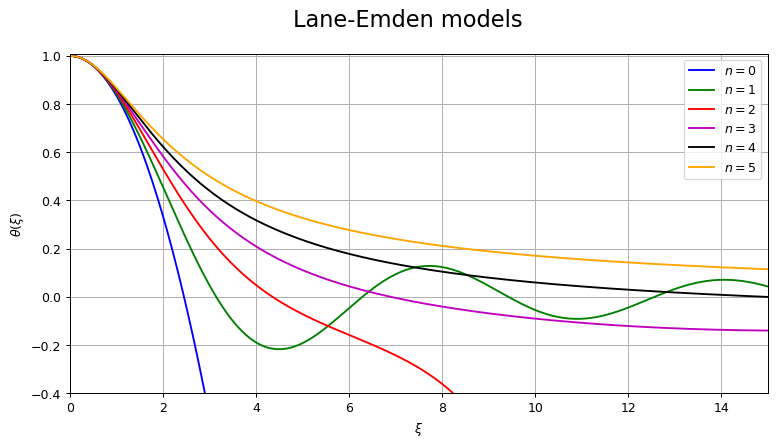

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# This defines the function that calculates the derivatives of the Lane-Emden system 
# In this case y[1] will correspond to the derivative of w 
# and y[0] to the derivative of \theta
# we also use r as \xi

from IPython.display import display, Math, Latex   # This imports the option of 
                                                 # printing out teX using display()

n = 0.0  
l = 1.0

def starLE(y, r, n, l):
     return (-pow(y[1],n)*r**2.0, l*y[0]/r**2.0,)   
    
    
y0 = (0.0, 1.0)     # This is the initial conditions vector (w_c, \theta_c)


r = np.linspace(0, 15, 401)        # This is an np.array object that creates the 
                                   # integration grid

dr=r[1]-r[0]
display(dr)

# Here we go straight to calculating the first point

y1 = (-(1.0/3.0)*dr**3.0, 1.0-(1.0/6.0)*dr**2.0)
display(y1)

r1 = np.linspace(dr, 15, 401)                      # This is an np.array object

n = 0.0                                          # Setting the polytropic index
soln00 = odeint(starLE, y1, r1, args =(n, l))    # This is an np.array object

n = 0.5
soln05 = odeint(starLE, y1, r1, args =(n, l))

n = 1.0
soln10 = odeint(starLE, y1, r1, args =(n, l))

n = 1.5
soln15 = odeint(starLE, y1, r1, args =(n, l))

n = 2.0
soln20 = odeint(starLE, y1, r1, args =(n, l))

n = 3.0
soln30 = odeint(starLE, y1, r1, args =(n, l))

n = 4.0
soln40 = odeint(starLE, y1, r1, args =(n, l))

n = 5.0
soln50 = odeint(starLE, y1, r1, args =(n, l))

y01 = np.array([[y0[0], y0[1]]])                # This is an np.array object
# display(y01.shape)

r0 = np.array([0.0])                        # This is an np.array object
# display(r0.shape)
# display(r1.shape)

#y0 = [0.0, 1.0]

r = np.hstack([r0,r1])
# display(r)

sol_n00 = np.vstack([y01,soln00])
# sol_n05 = np.vstack([y01,soln05])
sol_n10 = np.vstack([y01,soln10])
# sol_n15 = np.vstack([y01,soln15])
sol_n20 = np.vstack([y01,soln20])
sol_n30 = np.vstack([y01,soln30])
sol_n40 = np.vstack([y01,soln40])
sol_n50 = np.vstack([y01,soln50])

plt.figure(figsize=(10, 5), dpi=90)
plt.suptitle('Lane-Emden models', fontsize=18)

plt.xlim(0.0, 15.0) 
plt.ylim(-0.4, 1.01) 


plt.plot(r, sol_n00[:, 1], 'b', label=r'$n=0$') # The plots
# plt.plot(r, sol_n05[:, 1], 'r', label=r'$n=0.5$') 
plt.plot(r, sol_n10[:, 1], 'g', label=r'$n=1$') 
# plt.plot(r, sol_n15[:, 1], 'y', label=r'$n=1.5$') 
i=0
while list(sol_n20[:, 1])[i]>-2 :        # This while loop finds the index for which 
    i=i+1                                # the density becomes less than -2

r_max_p = i
plt.plot(r[0:r_max_p], sol_n20[0:r_max_p, 1], 'r', label=r'$n=2$') 
plt.plot(r, sol_n30[:, 1], 'm', label=r'$n=3$') 
plt.plot(r, sol_n40[:, 1], 'k', label=r'$n=4$') 
plt.plot(r, sol_n50[:, 1], color='orange', label=r'$n=5$') 

plt.legend(loc='best')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.grid()
plt.show()

i=0
while list(sol_n00[:, 1])[i]>0 :      # With this while loop we find the surface index
    i=i+1

r_max_in = i
display(Math(r'\textrm{for}\quad n=0,\quad \xi_1='\
             +str((r[r_max_in-1]+r[r_max_in])/2)
      +r',\quad -\left(\xi^2\frac{d\theta}{d\xi}\right)_{\xi_1}='\
             +str(-(sol_n00[r_max_in-1,0]+sol_n00[r_max_in,0])/2)))

i=0
while list(sol_n10[:, 1])[i]>0 :
    i=i+1

r_max_in = i
display(Math(r'\textrm{for}\quad n=1,\quad \xi_1='\
             +str((r[r_max_in-1]+r[r_max_in])/2)
      +r',\quad -\left(\xi^2\frac{d\theta}{d\xi}\right)_{\xi_1}='\
             +str(-(sol_n10[r_max_in-1,0]+sol_n10[r_max_in,0])/2)))

i=0
while list(sol_n20[:, 1])[i]>0 :
    i=i+1

r_max_in = i
display(Math(r'\textrm{for}\quad n=2,\quad \xi_1='\
             +str((r[r_max_in-1]+r[r_max_in])/2)
      +r',\quad -\left(\xi^2\frac{d\theta}{d\xi}\right)_{\xi_1}='\
             +str(-(sol_n20[r_max_in-1,0]+sol_n20[r_max_in,0])/2)))

i=0
while list(sol_n30[:, 1])[i]>0 :
    i=i+1

r_max_in = i
display(Math(r'\textrm{for}\quad n=3,\quad \xi_1='\
             +str((r[r_max_in-1]+r[r_max_in])/2)
      +r',\quad -\left(\xi^2\frac{d\theta}{d\xi}\right)_{\xi_1}='\
             +str(-(sol_n30[r_max_in-1,0]+sol_n30[r_max_in,0])/2)))

i=0
while list(sol_n40[:, 1])[i]>0 :
    i=i+1

r_max_in = i
display(Math(r'\textrm{for}\quad n=4,\quad \xi_1='\
             +str((r[r_max_in-1]+r[r_max_in])/2)
      +r',\quad -\left(\xi^2\frac{d\theta}{d\xi}\right)_{\xi_1}='\
             +str(-(sol_n40[r_max_in-1,0]+sol_n40[r_max_in,0])/2)))

#### Exercises:


1. Try calculating Lane-Emden models with non-integer values of $n$. A physically interesting case is the case for $n=3/2$. Implement a method to better estimate the surface location and the surface values for, $\left(-\xi^2\frac{d\theta}{d\xi}\right)_{\xi_1}$.
2. Plot the density and mass profiles inside the stars for all the models discussed. Compare the results with the results of exercise (3). What happens for $n\geq 5$?
3. Compare the numerical results against the exact solutions for the three known exact models, i.e., $n=0, 1, 5$. 
4. Repeat exercise (2) of the previous section for the Lane-Emden equation.


## Mass-Radius diagram


As we discussed in the previous section, for the Lane-Emden models, the stellar parameters can be given in terms of some of the properties of the Lane-Emden functions. So, we will have,


$$M = - 4\pi a^3 \rho_c \xi_{1,n}^2\left(\frac{d\theta}{d\xi}\right)_{\xi_{1,n}} = 4\pi a^3 \rho_c w_{1,n}, $$

where we have defined $w_{1,n}$ as $w_{1,n}=\left(-\xi^2\frac{d\theta}{d\xi}\right)_{\xi_{1,n}}$, and

$$ R = a \xi_{1,n} = \sqrt{\frac{(n+1) K \rho_c^{1/n-1}}{4\pi G}} \xi_{1,n},$$

where by the subscript ${1,n}$ we refer to the corresponding $\xi_1, w_1$ values for the given $n$ polytrope.

For a given polytropic index, these expressions give the radius and the mass of a configuration as a function of the central density. From these expressions we can make some general observations. For example, when $n=1$ we can see that the radius of the star is independent of the central density. Therefore all stellar models constructed using a $n=1$ polytrope will have the same radius. 

We can further eliminate the central density between the two expressions and arrive at a mass radius relation. This will take the form,

$$ 1 = N_n M^{\frac{n-1}{n}} R^{\frac{3-n}{n}},  $$

where we have introduced 

$$ N_n = \frac{G}{(n+1) K} \left[4\pi \left(\xi_{1,n}\right)^{n-3} \left( w_{1,n}\right)^{1-n}\right]^{1/n}. $$

We can finally express the mass as a function of the radius as,

$$ M = \left(N_n\right)^{\frac{n}{1-n}}  R^{\frac{3-n}{1-n}}. $$ 

From this expression we can already arrive at some interesting qualitative results. The first thing we notice is that for $n<1$ the mass increases with the radius, while for $1<n<3$ the mass decreases with the radius. We also notice that there are two special values for $n$, i.e., 

1. $n=1$ which we saw that corresponds to models of constant radius, and 
2. $n=3$ which corresponds to models of constant mass regardless the radius. 

We can get to the same result for the latter case if we notice that the mass is, $M\propto \rho_c^{\frac{3-n}{2n}}$.

#### Computational Applications:

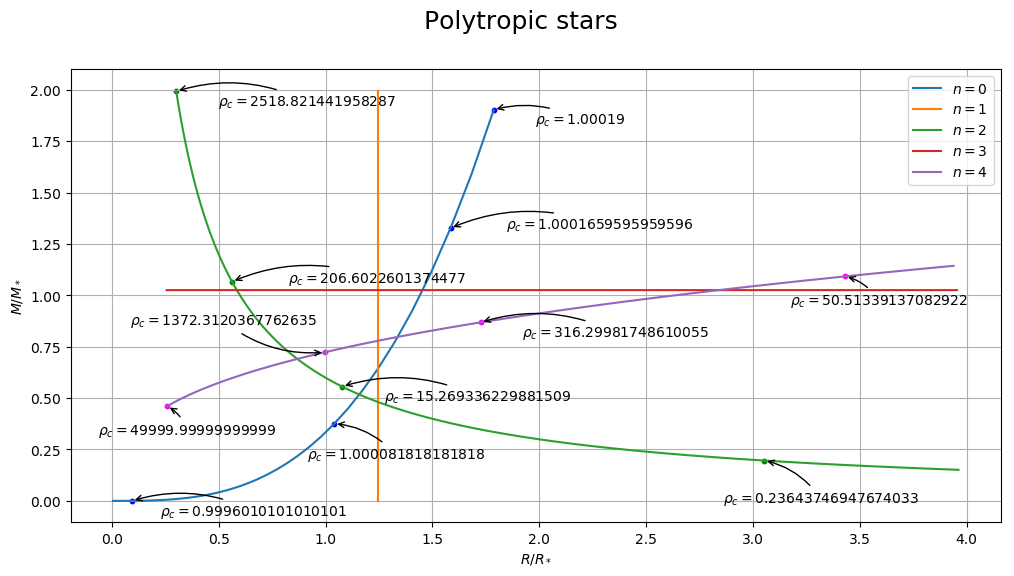

In [4]:
import math   # We need this in order to use some mathematical functions etc.

# display(math.sqrt(6))
# display(6*math.sqrt(6)/3)
# display(2.4502031250000003**(-3)*4.904118169879347)

#==========================================================
i=0
while list(sol_n00[:, 1])[i]>0 :      # With this while loop we find the surface index
    i=i+1

r_max_in = i
xi_1_00 = (r[r_max_in-1]+r[r_max_in])/2
w_1_00 = -(sol_n00[r_max_in-1,0]+sol_n00[r_max_in,0])/2

i=0
while list(sol_n10[:, 1])[i]>0 :      # With this while loop we find the surface index
    i=i+1

r_max_in = i
xi_1_10 = (r[r_max_in-1]+r[r_max_in])/2
w_1_10 = -(sol_n10[r_max_in-1,0]+sol_n10[r_max_in,0])/2

i=0
while list(sol_n20[:, 1])[i]>0 :      # With this while loop we find the surface index
    i=i+1

r_max_in = i
xi_1_20 = (r[r_max_in-1]+r[r_max_in])/2
w_1_20 = -(sol_n20[r_max_in-1,0]+sol_n20[r_max_in,0])/2

i=0
while list(sol_n30[:, 1])[i]>0 :      # With this while loop we find the surface index
    i=i+1

r_max_in = i
xi_1_30 = (r[r_max_in-1]+r[r_max_in])/2
w_1_30 = -(sol_n30[r_max_in-1,0]+sol_n30[r_max_in,0])/2

i=0
while list(sol_n40[:, 1])[i]>0 :      # With this while loop we find the surface index
    i=i+1

r_max_in = i
xi_1_40 = (r[r_max_in-1]+r[r_max_in])/2
w_1_40 = -(sol_n40[r_max_in-1,0]+sol_n40[r_max_in,0])/2
#==========================================================

plt.figure(figsize=(12, 6), dpi=100)

G = 1.0
K = 1.0

n = 0.0001                # Here we are using a n=0.0001 polytrope as a proxy for
                         # a n=0 polytrope because the 1/2n exponent is problematic
X = np.linspace(0.999, 1.00019, 100)
R = pow((n+1)*K/(4.0*np.pi*G),0.5)*xi_1_00*pow(X,(1.0-n)/(2.0*n))
M = pow((n+1)*K/(4.0*np.pi*G),1.5)*w_1_00*pow(X,(3.0-n)/(2.0*n))

plt.scatter([R[50], ], [M[50], ], 10, color='blue')   # This plots scatter points 
# plt.scatter([R[80], ], [M[80], ], 10, color='blue') # and here we use it to add some
plt.scatter([R[90], ], [M[90], ], 10, color='blue')   # points to our plot
plt.scatter([R[97], ], [M[97], ], 10, color='blue')
plt.scatter([R[99], ], [M[99], ], 10, color='blue')

plt.annotate(r'$\rho_c=$'+str(X[50]),                 # this adds annotations to a plot
             xy=(R[50], M[50]), xycoords='data',
             xytext=(20, -10), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[90]),
             xy=(R[90], M[90]), xycoords='data',
             xytext=(-20, -25), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[97]),
             xy=(R[97], M[97]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[99]),
             xy=(R[99], M[99]), xycoords='data',
             xytext=(30, -10), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(R, M, label=r'$n=0$')

n = 1.0

X = np.linspace(0, 10, 100)
R = pow((n+1)*K/(4.0*np.pi*G),0.5)*xi_1_10*pow(X,(1.0-n)/(2.0*n))
M = pow((n+1)*K/(4.0*np.pi*G),1.5)*w_1_10*pow(X,(3.0-n)/(2.0*n))

plt.plot(R, M, label=r'$n=1$')

n = 2.0

X = np.logspace(math.log(0.34), math.log(30), 100)
                                              # With this command instead of creating  
                                              # a linear list of grid points we are 
                                              # creating a logarithmic one with equal 
                                              # spacing in the exponents. Default base 
                                              # is 10. 
                                              # math.log used here is of base e.
R = pow((n+1)*K/(4.0*np.pi*G),0.5)*xi_1_20*pow(X,(1.0-n)/(2.0*n))
M = pow((n+1)*K/(4.0*np.pi*G),1.5)*w_1_20*pow(X,(3.0-n)/(2.0*n))

plt.scatter([R[10], ], [M[10], ], 10, color='green')
# plt.scatter([R[80], ], [M[80], ], 10, color='blue')
plt.scatter([R[50], ], [M[50], ], 10, color='green')
plt.scatter([R[75], ], [M[75], ], 10, color='green')
plt.scatter([R[99], ], [M[99], ], 10, color='green')

plt.annotate(r'$\rho_c=$'+str(X[10]),
             xy=(R[10], M[10]), xycoords='data',
             xytext=(-30, -30), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[50]),
             xy=(R[50], M[50]), xycoords='data',
             xytext=(30, -10), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[75]),
             xy=(R[75], M[75]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[99]),
             xy=(R[99], M[99]), xycoords='data',
             xytext=(30, -10), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(R, M, label=r'$n=2$')

n = 3.0
K = 2.0

X = np.linspace(2.7, 10000, 100000)
R = pow((n+1)*K/(4.0*np.pi*G),0.5)*xi_1_30*pow(X,(1.0-n)/(2.0*n))
M = pow((n+1)*K/(4.0*np.pi*G),1.5)*w_1_30*pow(X,(3.0-n)/(2.0*n))

plt.plot(R, M, label=r'$n=3$')

n = 4.0
K = 2.5

X = np.logspace(math.log10(35), math.log10(50000), 100)  # math.log10 used here 
                                                         # is of base 10.
R = pow((n+1)*K/(4.0*np.pi*G),0.5)*xi_1_40*pow(X,(1.0-n)/(2.0*n))
M = pow((n+1)*K/(4.0*np.pi*G),1.5)*w_1_40*pow(X,(3.0-n)/(2.0*n))

plt.scatter([R[5], ], [M[5], ], 10, color='magenta')
# plt.scatter([R[80], ], [M[80], ], 10, color='blue')
plt.scatter([R[30], ], [M[30], ], 10, color='magenta')
plt.scatter([R[50], ], [M[50], ], 10, color='magenta')
plt.scatter([R[99], ], [M[99], ], 10, color='magenta')

plt.annotate(r'$\rho_c=$'+str(X[5]),
             xy=(R[5], M[5]), xycoords='data',
             xytext=(-40, -20), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[30]),
             xy=(R[30], M[30]), xycoords='data',
             xytext=(30, -10), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[50]),
             xy=(R[50], M[50]), xycoords='data',
             xytext=(-140, 20), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(r'$\rho_c=$'+str(X[99]),
             xy=(R[99], M[99]), xycoords='data',
             xytext=(-50, -20), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(R, M, label=r'$n=4$')

plt.legend(loc='best')
plt.xlabel(r'$R/R_*$')
plt.ylabel(r'$M/M_*$')
plt.grid()

plt.suptitle('Polytropic stars', fontsize=18)

plt.show()


## Chandrasekhar limit and Maximum mass


### Some realistic equations of state

Since we've been discussing polytropic EoSs one can't help wondering what is the practical relevance of a polytrope. Here we will give some examples of situations where a polytrope is a good description for the EoS.


#### Isothermal ideal gas


Probably the most familiar case is that of an isotherma ideal gas. When one expresses the ideal gass EoS in terms of the density, one arrives at the equation,

$$ P=\left(\frac{\mathcal{R} T}{\mu}\right) \rho, $$

where $\mathcal{R}=8.315\times10^7 (\textrm{erg K}^{-1}\textrm{g}^{-1})$ is the ideal gas constant, $\mu$ is the (dimensionless) mean molecular weight (and the pressure is given in $\textrm{dyn cm}^{-2}$. 

This EoS is clearly a polytrope of $n=\infty$. The results of exersise (2) of section 1.3 have some interesting implications for isothermal spheres, i.e., since polytropes with $n\geq 5$ do not have a surface, there can be no isothermal stellar configurations. This doesn't mean that we still can't have a spherical shell inside the star described with an isothermal EoS. 


#### Ideal gas with radiation

Let's assume now that we have an ideal gas that is also supported by radiation pressure. The pressure of the ideal gas will be given by the above expression, while the radiation pressure will be given as, 

$$ P_{\textrm{rad}}=\frac{1}{3} U = \frac{\alpha}{3} T^4, $$

where $U$ is the energy density of the photon gas (i.e., $\rho c^2$) and $\alpha= 7.56464\times10^{-15}(\textrm{erg cm}^{-3}\textrm{K}^{-4}$ is the radiation density constant. 

The combined pressure of gas and radiation will be 

$$P=P_{\textrm{gas}}+P_{\textrm{rad}}=\left(\frac{\mathcal{R} T}{\mu}\right) \rho+\frac{\alpha}{3} T^4=\left(\frac{\mathcal{R} }{\mu \beta}\right) T \rho, $$

where we can define a useful quantity, the ratio $\beta=P_{\textrm{gas}}/P$, and use it to give the EoS in some special cases. Another useful quantity for astrophysical applications is the temperature gradient that is defined as $\nabla=\frac{d\ln T}{d\ln P}$ and gives the relation between the temperature and the pressure under various conditions, since for a given value of $\nabla$ we recover a relation between the pressure and the temperature of the form,

$$ T \propto P^{\nabla},$$

which when substituted to the above expression gives a polytropic equation of the form,

$$ P\propto \rho^{\frac{1}{1-\nabla}}, $$

with the polytropic exponent $\Gamma= \frac{1}{1-\nabla}$. 


1. **Ideal gas dominated by pressure:** In this case $\beta\approx 1$ and the temperature gradient is $\nabla=2/5$. According to the previous discussion this amounts to a polytropic EoS of the form, $$ P = K \rho^{5/3}$$ which is an $n=3/2$ polytrope. 

2. **Ideal gas dominated by radiation:** In this case $\beta \ll 1$ and the temperature gradient is $\nabla=1/4$. This can be seen by the fact that from $1-\beta=P_{\textrm{rad}}/P$ we get to $$ T=\left(\frac{3(1-\beta)}{\alpha}\right)P^{1/4}.$$ If we use this to express the pressure in terms of the density we arrive at, $$P=\left[\left(\frac{3\mathcal{R}^4}{a\mu^4}\right)^{1/3}\left(\frac{1-\beta}{\beta^4}\right)^{1/3}\right]\rho^{4/3}.$$


#### Degenerate Fermi gas

Here we will briefly remind the main results for a completely degenerate ideal Fermi gas. 

Let $E_F$ be the Fermi energy, i.e., the maximum occupied energy state at $T=0$. One can define the Fermi momentum for a relativistic particle as the one given by $E_F^2=p_F^2 c^2 +m^2 c^4$. One can further define the reduced Fermi momentum as $x=p_F/(mc)$ and the corresponding Compton wavelength of the particle $\lambda=\hbar/(mc)$.

Then, the number density of the gas is,

$$ n = \frac{2}{h^3}\int d^3p=\frac{1}{3\pi^2\lambda^3}x^3,$$

the pressure is, 

$$ P = \frac{2}{h^3}\int \frac{p^2 c^2}{(p^2 c^2 +m^2 c^4)^{1/2}}d^3p=\frac{m c^2}{\lambda^3}\phi(x),$$

and the energy density is,

$$ \varepsilon = \frac{2}{h^3}\int (p^2 c^2 +m^2 c^4)^{1/2}d^3p=\frac{m c^2}{\lambda^3}\chi(x),$$

where $\frac{2}{h^3}$ is the number density in phase space for the fermions with $1/2$ spin, and the two functions of the Fermi momentum have the form,

$$ \phi(x) = \frac{1}{8\pi^2}\left\{x \left(1+x^2\right)^{1/2}\left(\frac{2}{3}x^2-1\right)+\ln\left[x+\left(1+x^2\right)^{1/2}\right]\right\},$$

$$ \chi(x) = \frac{1}{8\pi^2}\left\{x \left(1+x^2\right)^{1/2}\left(1+2x^2\right)-\ln\left[x+\left(1+x^2\right)^{1/2}\right]\right\}.$$

These two functions have two interesting limits: 

1. Non-relativistic particles, i.e., $x\ll1$, where $$\phi(x)\rightarrow \frac{x^5}{15 \pi^2}\quad \textrm{and}\quad  \chi(x)\rightarrow \frac{x^3}{3 \pi^2},$$

2. Relativistic particles, i.e., $x\gg 1$, where $$\phi(x)\rightarrow \frac{x^4}{12 \pi^2}\quad \textrm{and}\quad \chi(x)\rightarrow \frac{x^4}{4 \pi^2}.$$

These limiting cases have applications to White Dwarfs and Neutron Stars. 


### White Dwarfs and Neutron Stars

#### White Dwarfs

In the case of White Dwarfs, the pressure is provided by degenerate electrons, while the density is provided by the baryons. The mass density of the baryons can be expressed in terms of the number density of the electrons and therefore we have,

$$ \rho=\frac{m_B}{Y_e}n_e = \mu_e m_u n_e\propto x^3,$$

where $m_B$ is the mean baryon rest mass, $Y_e$ is the mean number of electron per baryon, $\mu_e=\frac{m_b}{m_u Y_e}$ is the mean molecular weight per electron, and $m_u$ is the atomic mass unit. 

When the electrons are *non-relativistic*, the pressure is $P\propto x^5$ which leads to an EoS of the form

$$ P = K \rho^{5/3}. $$

On the other hand, when the electrons are *relativistic*, the pressure is $P\propto x^4$ which leads to an EoS of the form

$$ P = K \rho^{4/3}. $$

The latter one is the case of an $n=3$ polytrope which results in a constant mass configuration. Therefore, in the case of White Dwarfs, when the electron gas becomes relativistic, one arrives at a limiting mass configuration. This mass is the **Chandrasekhar limit** for White Dwarfs and is,

$$ M=1.457 \left(\frac{2}{\mu_e}\right)^2 M_{\odot}.$$


#### Neutron Stars

For Neutron stars, things are a little more complicated because in the ideal case, we have the mass density and the pressure both being provided by the same particles, i.e., the neutrons. Since the mass is provided by the neutrons, one has to use the energy density of the neutrons in order to find the mass density, which is,

$$\rho =\frac{\varepsilon}{c^2}=\frac{m_n}{\lambda_n^3}\chi(x).$$

When the neutrons are non-relativistic and $x\ll 1$, this is essentially just the number density times the neutron mass. 

Similarly, the pressure will be provided by the degenerate neutrons and it will be as we saw above,

$$ P = \frac{m_n c^2}{\lambda_n^3}\phi(x).$$

We can have here, as we had for white dwarfs, two extreme cases. 

When the neutrons are *non-relativistic* ($x\ll 1$), the density will be of the form, $\rho \propto x^3$, while the pressure will be of the form, $P\propto x^5$. This leads to an EoS of the form

$$ P = K \rho^{5/3}. $$

On the other hand, when the neutrons are *relativistic* ($x\gg 1$), the density will be of the form, $\rho \propto x^4$, while the pressure will be of the form, $P\propto x^4$. This, in contrast to what happens for white dwarfs, leads to an EoS of the form

$$ P = K \rho. $$

#### Computational Applications:

In [13]:
Κ = 1.0

X = np.logspace(math.log10(1), math.log10(100), 100)  # math.log10 is of base 10.
P = K*X*math.sqrt(1+X**2.0)*((2.0/3.0)*X**2.0-1)+math.log(X+math.sqrt(1+X**2.0))
rho = X*math.sqrt(1+X**2.0)*(1+2.0*X**2.0)-math.log(X+math.sqrt(1+X**2.0))


plt.plot(rho, P, label='neutron gas')


plt.legend(loc='best')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$P$')
plt.grid()

plt.yscale("log")

plt.suptitle('Polytropic stars', fontsize=18)

plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

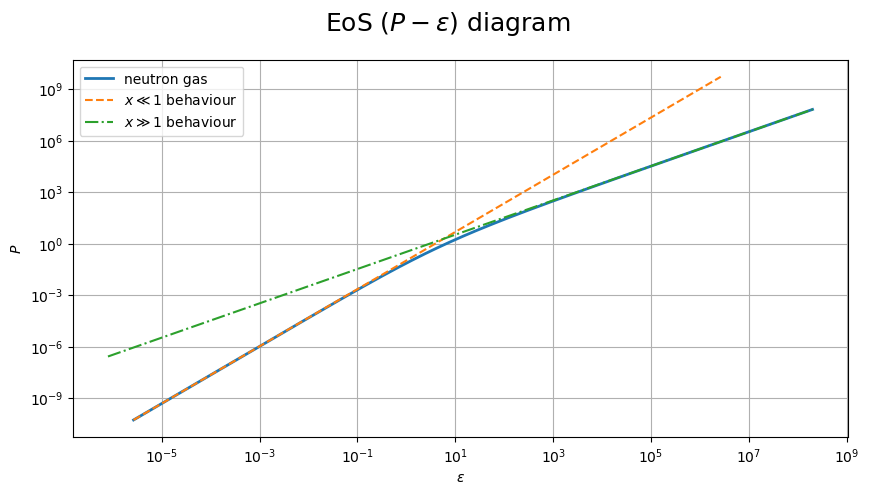

In [33]:
# np.objects don't mix well with math.objects and that 
# was the reason for the above error. We now use np.functions 

Κ = 1.0

X = np.logspace(math.log10(0.01), math.log10(100), 1000)  # math.log10 is of base 10.
P = K*X*np.sqrt(1+X**2.0)*((2.0/3.0)*X**2.0-1)+np.log(X+np.sqrt(1+X**2.0))
rho = X*np.sqrt(1+X**2.0)*(1+2.0*X**2.0)-np.log(X+np.sqrt(1+X**2.0))

plt.figure(figsize=(10, 5), dpi=100)

plt.plot(rho, P, label='neutron gas', linewidth=2.0)


P = K*(8.0/15.0)*X**5.0
rho = (8.0/3.0)*X**3.0

plt.plot(rho, P, label=r'$x\ll1$ behaviour', linestyle="--")


P = K*(8.0/12.0)*X**4.0
rho = (8.0/4.0)*X**4.0

plt.plot(rho[100:1000], P[100:1000], label=r'$x\gg1$ behaviour', linestyle="-.")

plt.legend(loc='best')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$P$')
plt.grid()

plt.yscale("log")  # This changes the scale to logarithmic
plt.xscale("log")  # This changes the scale to logarithmic

plt.suptitle(r'EoS $(P-\varepsilon)$ diagram', fontsize=18)

plt.show()

#### Exercises:


1. Derive the expression for the Chandrasekhar limit for white dwarfs. 

2. Derive the exact equation of state for the extremely relativistic neutrons. What does this EoS describe?

3. Assuming that neutron stars are described by Newtonian gravity, is there a maximum mass in that case too? Produce the mass-radius diagram for the EoS of the neutrons and try to figure out what happens.

4. Construct a fluid configuration using a mixed polytope (piecewise polytrope). Specifically, try constructing a configuration with an isothermal core and a gas pressure dominated exterior and an isothermal core and a radiation pressure dominated exterior. Plot the mass and density profiles inside the configurations and the overall EoSs for the two cases. Compare the results. 

## References


1. **Black Holes, White Dwarfs, and Neutron Stars**, Shapiro and Teukolsky (1983) John Wiley & Sons.

2. **Theory of Rotating Stars**, Jean-Louis Tassoul (1978) Princeton University Press.

3. **An Introduction to the study of stellar structure**, S. Chandrasekhar (1938) The University of Chicago Press.

4. **Stars and Relativity**, Zel'dovich and Novikov (1971) The University of Chicago Press.